In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from concurrent.futures import thread
import numpy as np
# import cv2
# import seaborn as sns
import matplotlib.pyplot as plt
# 也可以直接采用这个进行计算
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, recall_score, precision_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

### loss曲线，F1曲线，Acc曲线

In [ ]:
###loss变化曲线
data = np.load('result/loss_log/allpatentdata_templatedocking_attach_cvloss/-1/fine_tune_loss_log.npy',allow_pickle=True)

print(min(data),np.argmin(data))  #[0:200]

plt.plot(data) #[0:200]
# plt.ylim((0,1)) #2 0.35

In [ ]:
###AUC变化曲线
# data = np.load('result/loss_log/p53_Patent150_no_ABN_weight_correction_two_mlplayers_lre-3/1/fine_tune_auc_log.npy')
data = np.load('result/loss_log/debug_code_v3_attach_aucrecall_loss/1/fine_tune_auc_log.npy')
print(max(data),np.argmax(data))  #[0:200]
plt.plot(data) #[0:200]
# plt.ylim((0,1)) #2 0.35

In [12]:
###多折交叉验证的时候
f = open("allpatentdata_templatedocking_attach_cvloss.log")  #             # 返回一个文件对象 
lines = f.readlines()               # 调用文件的 readline()方法 
f.close()

recall_data=[]
precision_data=[]
accuracy_data=[]
f1_data=[]
flag=1 #close
for line in lines:
    if "fold: 1" in line:
        flag=1 #open
    if "fold: 2" in line:
        flag=0 #close
    ## F1-score
    if flag==1 and "sklearn F1-score:" in line and "round" not in line:
        # print(line.split("sklearn F1-score:")[1])
        if line.split("sklearn F1-score:")[1]=='nan':
            f1_data.append(0)
            # print('nan')
        else:
            f1_data.append(float(line.split("sklearn F1-score:")[1]))
    # Accuracy
    if flag==1 and "sklearn accuracy:" in line:
        # print(line.split("sklearn accuracy:")[1])
        accuracy_data.append(float(line.split("sklearn accuracy:")[1]))
        # if line.split("sklearn recall:")[1]=='nan':
        #     f1_data.append(0)
        #     # print('nan')
        # else:
        #     f1_data.append(float(line.split("sklearn F1-score:")[1]))
        # if flag==1 and "sklearn F1-score:" in line and "round" not in line:
        # print(line.split("sklearn F1-score:")[1])
    # if line.split("sklearn F1-score:")[1]=='nan':
    #     f1_data.append(0)
    #     # print('nan')
    # else:
    #     f1_data.append(float(line.split("sklearn F1-score:")[1]))
    
# del recall_data[200]
# del precision_data[200]
del accuracy_data[200]
del f1_data[200]

# len(f1_data)
# f1_data[199:]

In [2]:
###使用全部数据的时候
f = open("allpatentdata_templatedocking_attach_cvloss.log")  #             # 返回一个文件对象 
lines = f.readlines()               # 调用文件的 readline()方法 
f.close()

recall_data=[]
precision_data=[]
accuracy_data=[]
f1_data=[]

for line in lines:
    try:
        ## F1-score
        if "sklearn F1-score:" in line and "round" not in line:
            # print(line.split("sklearn F1-score:")[1])
            if line.split("sklearn F1-score:")[1]=='nan':
                f1_data.append(0)
                # print('nan')
            else:
                f1_data.append(float(line.split("sklearn F1-score:")[1]))
        # Accuracy
        if "sklearn accuracy:" in line:
            # print(line.split("sklearn accuracy:")[1])
            accuracy_data.append(float(line.split("sklearn accuracy:")[1]))
            # if line.split("sklearn recall:")[1]=='nan':
            #     f1_data.append(0)
            #     # print('nan')
            # else:
            #     f1_data.append(float(line.split("sklearn F1-score:")[1]))
            # if flag==1 and "sklearn F1-score:" in line and "round" not in line:
            # print(line.split("sklearn F1-score:")[1])
        # if line.split("sklearn F1-score:")[1]=='nan':
        #     f1_data.append(0)
        #     # print('nan')
        # else:
        #     f1_data.append(float(line.split("sklearn F1-score:")[1]))
    except:
        print(line)

sklearn accuracy: /home/ubuntu/anaconda3/envs/chemprop/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.

sklearn accuracy: 0.15/home/ubuntu/anaconda3/envs/chemprop/lib/python3.10/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.



In [2]:
print(len(f1_data),len(accuracy_data))
f1_data[39:42]
accuracy_data[39:42]

0.6667 118


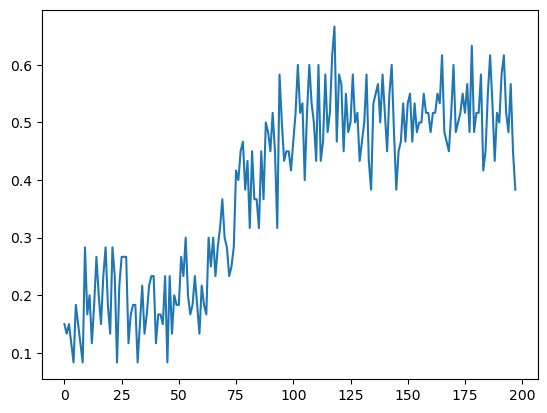

In [4]:
###Accuracy变化曲线
print(max(accuracy_data),np.argmax(accuracy_data))
plt.plot(accuracy_data) #[0:200]
# plt.ylim((0,1)) #2 0.35

0.75 0 (array([], dtype=int64),)


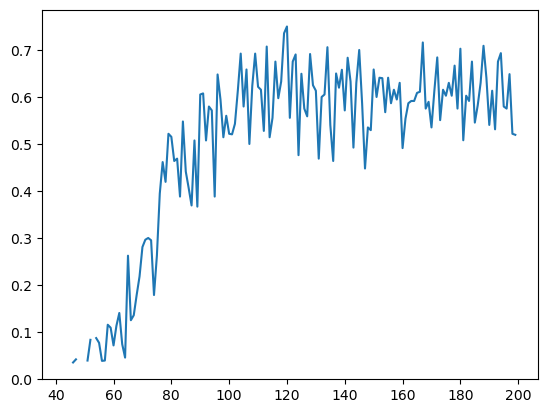

In [5]:
##F1变化曲线
print(max([tmp for tmp in f1_data if tmp>0]),np.argmax(f1_data),np.where(np.array(f1_data)==0.9358))  #[0:200]
plt.plot(f1_data) #[0:200]
# plt.ylim((0,1)) #2 0.35

In [3]:
# ###计算CV值
# trainset_predict_value=list(data_2['new_label'])
# np.mean(trainset_predict_value),np.std(trainset_predict_value),np.std(trainset_predict_value)/np.mean(trainset_predict_value)

# trainset_predict_value=list(data_2['pred'])
# np.mean(trainset_predict_value),np.std(trainset_predict_value),np.std(trainset_predict_value)/np.mean(trainset_predict_value)

#### 分类模型统计性能

In [77]:
def calculate_metrics(gt, pred):
    """
    :param gt: 数据的真实标签，一般对应二分类的整数形式，例如:y=[1,0,1,0,1]
    :param pred: 输入数据的预测值，因为计算混淆矩阵的时候，内容必须是整数，所以对于float的值，应该先调整为整数
    :return: 返回相应的评估指标的值
    """
    """
        confusion_matrix(y_true,y_pred,labels,sample_weight,normalize)
        y_true:真实标签；
        y_pred:预测概率转化为标签；
        labels:用于标签重新排序或选择标签子集；
        sample_weight:样本权重；
        normalize:在真实（行）、预测（列）条件或所有总体上标准化混淆矩阵；
    """
 
    # 采用sklearn提供的函数验证,用于对比混淆矩阵方法与这个方法的区别
    print("the result of sklearn package")
    # auc = roc_auc_score(gt,pred)
    # print("sklearn auc:",auc)
    accuracy = accuracy_score(gt,pred)
    print("sklearn accuracy:",round(accuracy,4))
    recal = recall_score(gt,pred)
    precision = precision_score(gt,pred)
    tn, fp, fn, tp = confusion_matrix(gt, pred).ravel()
    specificity = tn / (tn+fp)
    print("sklearn recall:{},precision:{},specificity:{}".format(round(recal,4),round(precision,4),round(specificity,4)))
    print("sklearn F1-score:{}".format(round((2*recal*precision)/(recal+precision),4)))
    
    
def draw_ROC_curve(y_label, y_pre, filename):
    fpr, tpr, thersholds = roc_curve(y_label, y_pre)
    # print(fpr,tpr,thersholds)
    
    ## 使用tpr-fpr最大作为阈值选择标准
    maxindex = (tpr-fpr).tolist().index(max(tpr-fpr))
    threshold = thersholds[maxindex]
    print('threshold',threshold,'maxindex',maxindex,'tpr',tpr[maxindex],'fpr',fpr[maxindex])
    
    ##使用G-mean作为最佳阈值的寻找方法
    gmean = np.sqrt(tpr * (1 - fpr))
    index = np.argmax(gmean)
    thresholdOpt = thersholds[index] #round(thersholds[index], ndigits = 4)
    gmeanOpt = round(gmean[index], ndigits = 4)
    fprOpt = round(fpr[index], ndigits = 4)
    tprOpt = round(tpr[index], ndigits = 4)
    print('Best Threshold for: {}(Index: {}) with G-Mean: {}'.format(thresholdOpt, index, gmeanOpt))
    print('FPR: {}, TPR: {}'.format(fprOpt, tprOpt))

    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, 'k--', label='ROC (area = {0:.2f})'.format(roc_auc), lw=2)
    plt.plot([fpr[index]], [tpr[index]], color='brown',marker='o',linestyle='dashed')
    plt.annotate('Optimal threshold for \n class: {}'.format(thresholdOpt), xy=(fpr[index],tpr[index])
                 , xytext=(fpr[index]+0.05,tpr[index]-0.2),
            arrowprops=dict(
                facecolor='black'
                ),
            )
    plt.xlim([-0.05, 1.05])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')  # 可以使用中文，但需要导入一些库即字体
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    # plt.show()
    plt.savefig(filename+".png")
    
    return thresholdOpt

def draw_prop_distribution(label1_pred_list,label0_pred_list,bin,file_name):
    sns.kdeplot(label1_pred_list, shade=True, label='Active ligand',color='r')
    sns.kdeplot(label0_pred_list, shade=True, label='Inactive ligand',color='lightseagreen')
    plt.legend()
    plt.savefig(file_name+'1.png')
    
    plt.figure()
    plt.hist(label1_pred_list, bins=bin, histtype="stepfilled",color='mistyrose',label='Active ligand prob') #mistyrose=.7,
    plt.hist(label0_pred_list, bins=bin, alpha=.5,histtype="stepfilled",color='lightseagreen',label='Inactive ligand prob')
    plt.legend()
    plt.savefig(file_name+'2.png')
    
def draw_enrichment_curve(data_2,filename='ABN_cvloss_pred_4'):
    ## different threadshod, get ture_positive_rate ->(x=Top K% , y=ture_positive_rate)
    x_topk_predict_score=[] #x axis
    y_tpr=[] #y axis
    thersholds=[]

    tmp_list=list(data_2['pred'])
    tmp_list.sort(reverse=True)
    for k in np.arange(0,data_2.shape[0]):
        x_topk_predict_score.append(k)
        threadshold=tmp_list[k]  #np.percentile(data_2['pred'], 100-k)
        thersholds.append(threadshold)
        # print("Top %d: %f"%(k,threadshold))
        # print(sum(data_2[data_2['pred']>threadshold]['predict_label'])/sum(data_2['predict_label'])*100)
        y_tpr.append(sum(data_2[data_2['pred']>threadshold]['label']))
        # y_tpr.append(sum(data_2[data_2['pred']>threadshold]['predict_label'])/sum(data_2['predict_label'])*100)

    # plt.style.use('ggplot')
    plt.plot(x_topk_predict_score, y_tpr, lw=2, color="blue") #label='ROC (area = {0:.2f})'.format(roc_auc),
    # plt.scatter(np.array(x_topk_predict_score)[[1,5,10,20,50]],np.array(y_tpr)[[1,5,10,20,50]],s=30,marker='o',color='brown')

    for tmp in [1,5,10,20]:
        # 显示坐标点
        plt.scatter(np.array(x_topk_predict_score)[tmp],np.array(y_tpr)[tmp],s=20,marker='x',color = "r")
        # 显示坐标点横线、竖线
        # 显示坐标点坐标值
        plt.text(np.array(x_topk_predict_score)[tmp], np.array(y_tpr)[tmp], (int(np.array(x_topk_predict_score)[tmp]),round(np.array(y_tpr)[tmp],2)),ha='left', va='top', fontsize=11)

    # plt.xlim([-2, 105])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
    # plt.ylim([-2, 105])
    plt.xlabel('Top K molecular number')
    plt.ylabel('Active molecular number')  # 可以使用中文，但需要导入一些库即字体
    # # plt.title('ROC Curve')
    plt.grid(True, linestyle = "--", color = "g", linewidth = "0.5")
    # # plt.legend(loc="lower right")
    # # plt.show()
    plt.savefig(filename+'.png')
    


def draw_pred_ic50_regression(true_ic50,pred_score,filename='all_patentdata_ABN_pred_dist3'):
    plt.style.use('ggplot')
    
    x = true_ic50#np.array([5,7,8,7,2,17,2,9,4,11,12,9,6])
    y = pred_score#np.array([99,86,87,88,111,86,103,87,94,78,77,85,86])
    r = sns.regplot(x=x,y=y,color='#88c999')

    plt.xlabel('Experiment value(IC50)',)
    plt.ylabel('Model prediction(Predict score)')

    # plt.plot([min(x), max(x)],[max(y),min(y) ], 'r--', lw=2)
    pccs = np.corrcoef(x, y)
    pccs[0][1]
    plt.text(1300, 0.65, 'R=%.4f'%pccs[0][1], fontsize=12) #1300,  -8
    plt.savefig(filename+'.png')

In [16]:
data_2 = pd.read_csv('predict_csv/allpatentdata_templatedocking_attach_cvloss/P53_molecuale-2_with_preds.csv', index_col=0) #   predict_csv/allpatentdata_templatedocking_attach_cvloss/P53_molecuale-2_with_preds.csv
data_2.head(3)

,Activity(nm),new_label,pred
Index,,,
4043,23,1,0.607348
4390,8,1,0.807662
4366,6,1,0.400834


In [ ]:
####统计不同range中的average rank
new_data_2=data_2.sort_values("pred",ascending=False).reset_index().reset_index()
new_data_2['index']=new_data_2['index'].map(lambda x:x+1)
new_data_2['Activity(nm)']=new_data_2['Activity(nm)'].map(lambda x: 1500 if x=='None' else float(x))
new_data_2#.head()

In [13]:
# np.array(new_data_2[(new_data_2["Activity(nm)"]>=300) & (new_data_2["Activity(nm)"]<350)]['index']).mean()
np.array(new_data_2[(new_data_2["Activity(nm)"]>=350)]['index']).mean()
# np.array(new_data_2[(new_data_2["Activity(nm)"]<50)]['index']).mean()

25.5625

In [15]:
data_2.head(3)

,Activity(nm),label,pred,predict_label
Index,,,,
4043,23,1,0.970955,1
4390,8,1,0.846058,1
4366,6,1,0.945283,1


In [3]:
###看inhouse数据集直接使用docking score
inhouse38_docking_df=pd.read_csv("./inhouse38_docking_score.csv")
inhouse38_docking_df.head(3)

,index,sc150,docking score
0,4229,3,-9.646
1,4474,54,-9.628
2,4055,46,-9.626


In [4]:
# inhouse38_docking_df['new_label']=c
# inhouse38_docking_df=inhouse38_docking_df.rename(columns={"new_label":"label"})
inhouse38_docking_df=inhouse38_docking_df.rename(columns={"sc150":"Activity(nm)"})
inhouse38_docking_df=inhouse38_docking_df.rename(columns={"docking score":"pred"})
inhouse38_docking_df.head(3)

,index,Activity(nm),pred
0,4229,3,-9.646
1,4474,54,-9.628
2,4055,46,-9.626


/tmp/ipykernel_1761/379565750.py:71: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(label1_pred_list, shade=True, label='Active ligand',color='r')
/tmp/ipykernel_1761/379565750.py:72: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(label0_pred_list, shade=True, label='Inactive ligand',color='lightseagreen')


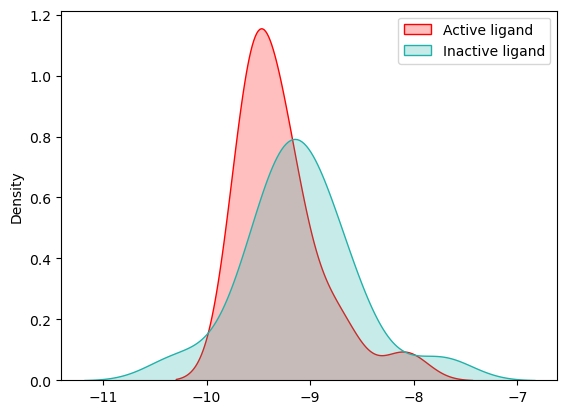

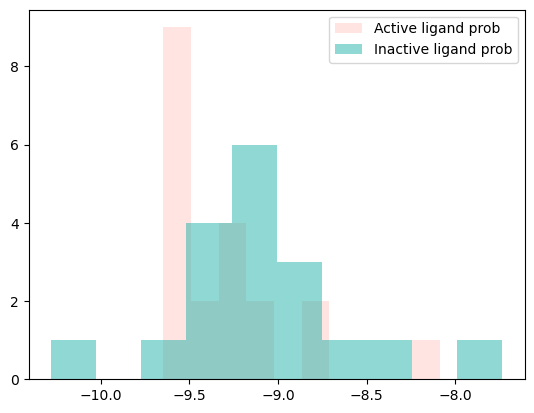

In [6]:
###正负样本的预测值分布
label1_pred_list=list(inhouse38_docking_df[inhouse38_docking_df['label']==1]['pred'])
label0_pred_list=list(inhouse38_docking_df[inhouse38_docking_df['label']==0]['pred'])
draw_prop_distribution(label1_pred_list,label0_pred_list,10,'./images/inhouse38_docking_dist_on_different_lable')

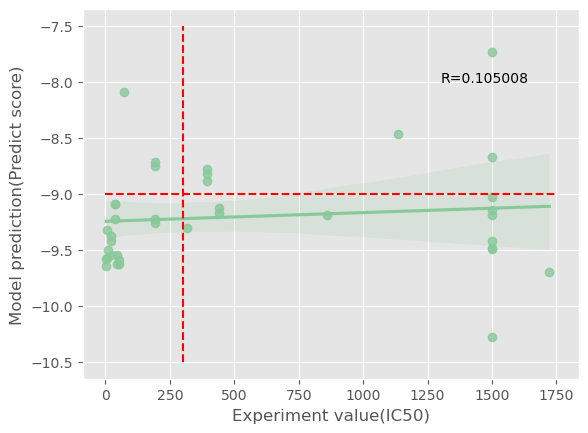

In [7]:
true_ic50=[1500 if tmp=='None'  else float(tmp) for tmp in list(inhouse38_docking_df['Activity(nm)'])]
pred_score=[tmp for tmp in list(inhouse38_docking_df['pred'])]
draw_pred_ic50_regression(true_ic50,pred_score,filename='./images/inhouse38_docking_scatter_value_with_ic50_on_inhouse')

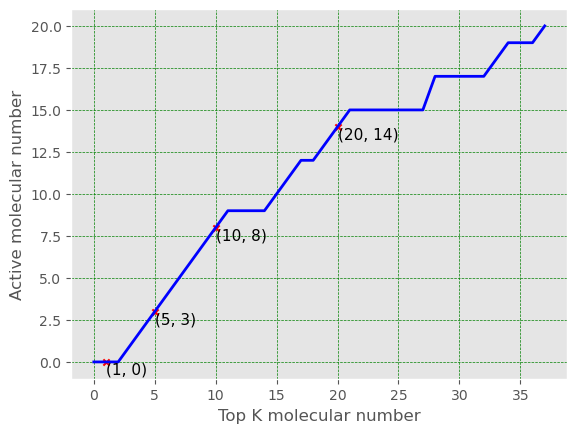

In [8]:
# dict1 = dict(zip(data_2.index,data_2['Activity(nm)']))
# # dict1
inhouse38_docking_df.head(3)
inhouse38_docking_df['pred']=inhouse38_docking_df['pred'].map(lambda x:np.abs(x))
inhouse38_docking_df.head(3)
draw_enrichment_curve(inhouse38_docking_df,filename='./images/inhouse38_docking_EF_curve') #all_patent_data_ABN_pred_EF_curve

sklearn auc: 0.6681
the result of sklearn package
sklearn accuracy: 0.6053
sklearn recall:0.85,precision:0.5862,specificity:0.3333
sklearn F1-score:0.6939
threshold 9.222 maxindex 8 tpr 0.75 fpr 0.3333333333333333
Best Threshold for: 9.222(Index: 8) with G-Mean: 0.7071
FPR: 0.3333, TPR: 0.75


9.222

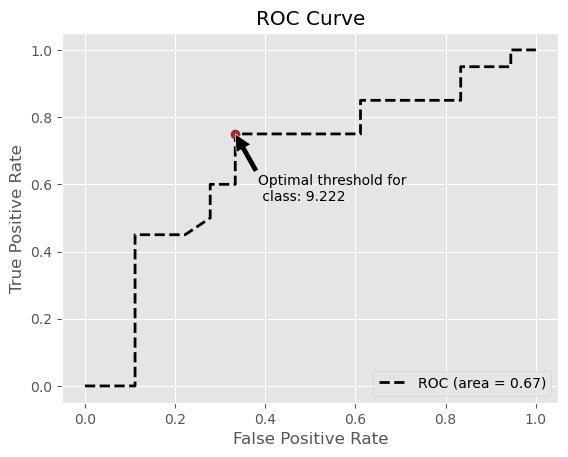

In [9]:
gt=list(inhouse38_docking_df['label'])
pred=[np.abs(tmp) for tmp in list(inhouse38_docking_df['pred'])] ##需要做这个操作
auc_value = roc_auc_score(gt,pred)
print("sklearn auc:",round(auc_value,4))
## Other metrics
calculate_metrics(gt=list(gt), pred=[1 if tmp>9 else 0 for tmp in list(pred)])

draw_ROC_curve(gt, pred, filename="./images/inhouse38_docking_auc_curve") #

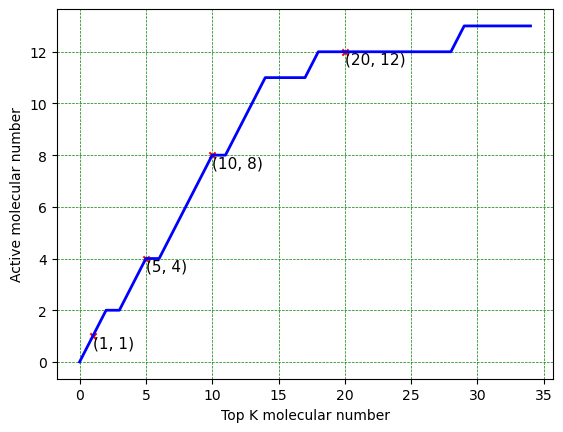

In [4]:
draw_enrichment_curve(data_2,filename='./images/patent_data_fold1_ABN_pred_gt_threshold50_EF_curve') #all_patent_data_ABN_pred_EF_curve

sklearn auc: 0.8566
the result of sklearn package
sklearn accuracy: 0.6286
sklearn recall:0.9231,precision:0.5,specificity:0.4545
sklearn F1-score:0.6486
threshold 0.8460579 maxindex 8 tpr 0.8461538461538461 fpr 0.13636363636363635
Best Threshold for: 0.8460579(Index: 8) with G-Mean: 0.8549
FPR: 0.1364, TPR: 0.8462


0.8460579

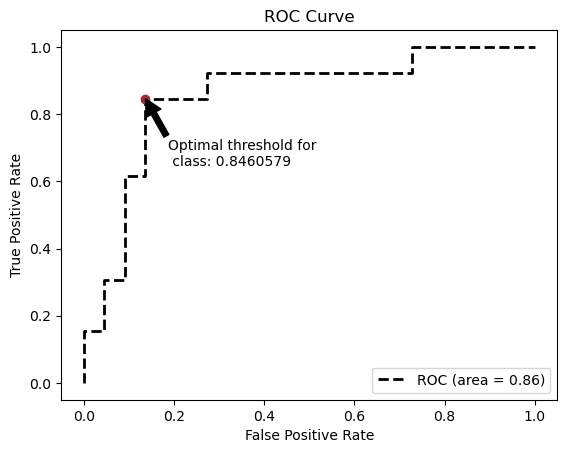

In [5]:
gt=list(data_2['label'])
pred=list(data_2['pred']) #pred_reverse
auc_value = roc_auc_score(gt,pred)
print("sklearn auc:",round(auc_value,4))
## Other metrics
calculate_metrics(gt=list(gt), pred=[1 if tmp>0.5 else 0 for tmp in list(pred)])

draw_ROC_curve(gt, pred, filename="./images/patent_data_fold1_ABN_pred_threshold50_auc_curve") #

/tmp/ipykernel_5286/1717955713.py:71: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(label1_pred_list, shade=True, label='Active ligand',color='r')
/tmp/ipykernel_5286/1717955713.py:72: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(label0_pred_list, shade=True, label='Inactive ligand',color='lightseagreen')


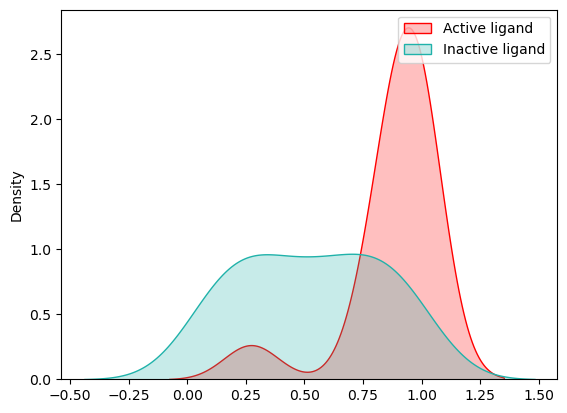

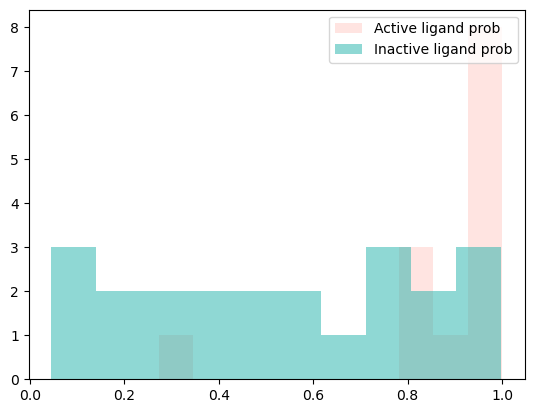

In [6]:
###正负样本的预测值分布
label1_pred_list=list(data_2[data_2['label']==1]['pred'])
label0_pred_list=list(data_2[data_2['label']==0]['pred'])
draw_prop_distribution(label1_pred_list,label0_pred_list,10,'./images/patent_data_fold1_ABN_pred_threshold50_dist_on_different_lable')

In [17]:
data_2.head(3)

,Activity(nm),new_label,pred
Index,,,
4043,23,1,0.607348
4390,8,1,0.807662
4366,6,1,0.400834


In [ ]:
###看inhouse数据集直接使用docking score
inhouse38_docking_df=pd.read_csv("./inhouse38_docking_score.csv")
inhouse38_docking_df.head(3)

# inhouse38_docking_df['new_label']=c
# inhouse38_docking_df=inhouse38_docking_df.rename(columns={"new_label":"label"})
inhouse38_docking_df=inhouse38_docking_df.rename(columns={"sc150":"Activity(nm)"})
inhouse38_docking_df=inhouse38_docking_df.rename(columns={"docking score":"pred"})
inhouse38_docking_df.head(3)

inhouse38_docking_df=inhouse38_docking_df[inhouse38_docking_df['Activity(nm)']!='None']
inhouse38_docking_df['Activity(nm)']=inhouse38_docking_df['Activity(nm)'].astype(float)
inhouse38_docking_df=inhouse38_docking_df[inhouse38_docking_df['Activity(nm)']<100]
inhouse38_docking_df

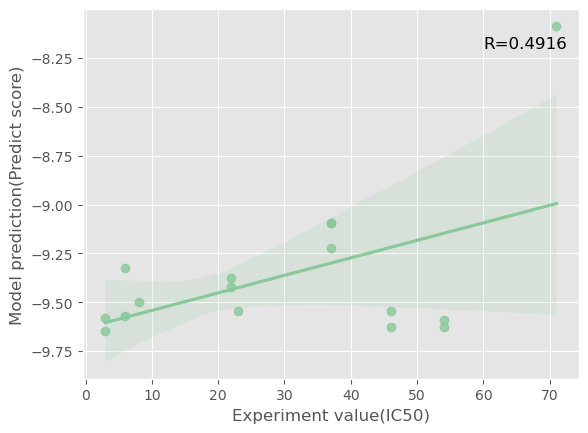

In [57]:
true_ic50=[1500 if tmp=='None'  else float(tmp) for tmp in list(inhouse38_docking_df['Activity(nm)'])]
pred_score=[tmp for tmp in list(inhouse38_docking_df['pred'])]
draw_pred_ic50_regression(true_ic50,pred_score,filename='./images/docking_socre_scatter_value_with_ic50_on_inhouse_on_range_less_than_100')

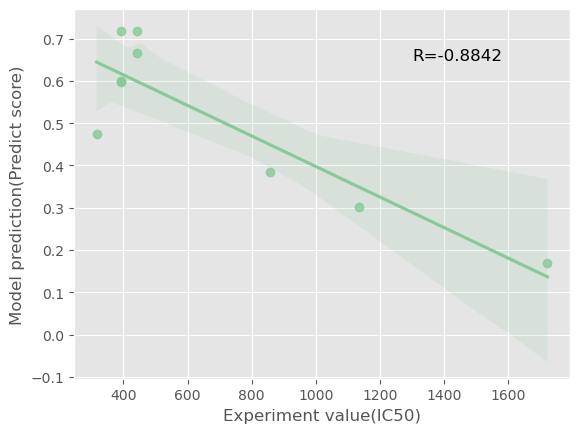

In [78]:
true_ic50=[1500 if tmp=='None'  else float(tmp) for tmp in list(data_2['Activity(nm)'])]
pred_score=[tmp for tmp in list(data_2['pred'])]
draw_pred_ic50_regression(true_ic50,pred_score,filename='./images/all_patent_data_train_model_scatter_value_with_ic50_on_inhouse_on_range_grate_than300_sample')

In [11]:
data_2['Activity(nm)']=data_2['Activity(nm)'].map(lambda x: 1500 if x=='None' else float(x))

In [6]:
# data_2.head(3)
inhouse38_docking_df.head(3)

,index,Activity(nm),pred
0,4229,3,-9.646
1,4474,54,-9.628
2,4055,46,-9.626


In [14]:
df_1=data_2[data_2['Activity(nm)']<50]
df_2=data_2[(data_2['Activity(nm)']>=50) & (data_2['Activity(nm)']<100)]
df_2=data_2[(data_2['Activity(nm)']>=100) & (data_2['Activity(nm)']<200)]

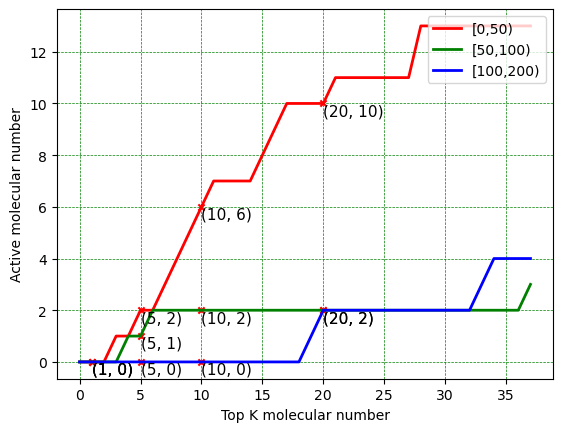

In [12]:
# 
# data_file_name="predict_csv/allpatentdata_templatedocking_attach_cvloss/P53_molecuale-2_with_preds.csv" #'predict_csv/attach_cv_loss/P53_molecuale-2_with_preds-fold1.csv'
data_file_name="./inhouse38_docking_score.csv"
#### <50
df_1 = pd.read_csv(data_file_name, index_col=0) #   predict_csv/allpatentdata_templatedocking_attach_cvloss/P53_molecuale-2_with_preds.csv
df_1=df_1.rename(columns={"sc150":"Activity(nm)","docking score":"pred"})
df_1["pred"]=df_1["pred"].map(lambda x:np.abs(x))
df_1['new_label']=df_1['Activity(nm)'].map(lambda x: 0 if x=='None' or float(x)>50 else 1)
df_1['predict_label']=df_1['pred'].map(lambda x: 1 if x>0.5 else 0) #0.5
df_1=df_1.rename(columns={"new_label":"label"})
df_1#.head(3)

#### >=50 and <100
df_2 = pd.read_csv(data_file_name, index_col=0) #   predict_csv/allpatentdata_templatedocking_attach_cvloss/P53_molecuale-2_with_preds.csv
df_2=df_2.rename(columns={"sc150":"Activity(nm)","docking score":"pred"})
df_2["pred"]=df_2["pred"].map(lambda x:np.abs(x))
df_2['new_label']=df_2['Activity(nm)'].map(lambda x: 0 if x=='None' or float(x)<50 or float(x)>100 else 1)
df_2['predict_label']=df_2['pred'].map(lambda x: 1 if x>0.5 else 0) #0.5
df_2=df_2.rename(columns={"new_label":"label"})
df_2#.head(3)

#### >=100 and <200
df_3 = pd.read_csv(data_file_name, index_col=0) #   predict_csv/allpatentdata_templatedocking_attach_cvloss/P53_molecuale-2_with_preds.csv
df_3=df_3.rename(columns={"sc150":"Activity(nm)","docking score":"pred"})
df_3["pred"]=df_3["pred"].map(lambda x:np.abs(x))
df_3['new_label']=df_3['Activity(nm)'].map(lambda x: 0 if x=='None' or float(x)<100 or float(x)>200 else 1)
df_3['predict_label']=df_3['pred'].map(lambda x: 1 if x>0.5 else 0) #0.5
df_3=df_3.rename(columns={"new_label":"label"})
df_3#.head(3)

def new_draw_enrichment_curve(df_1,df_2,df_3,filename='ABN_cvloss_pred_4'):
    # different threadshod, get ture_positive_rate ->(x=Top K% , y=ture_positive_rate)
    for data,c,label in zip([df_1,df_2,df_3],['r','g','b'],['[0,50)','[50,100)','[100,200)']):
        x_topk_predict_score=[] #x axis
        y_tpr=[] #y axis
        thersholds=[]

        tmp_list=list(data['pred'])
        tmp_list.sort(reverse=True)
        for k in np.arange(0,data.shape[0]):
            x_topk_predict_score.append(k)
            threadshold=tmp_list[k]  #np.percentile(data_2['pred'], 100-k)
            thersholds.append(threadshold)
            # print("Top %d: %f"%(k,threadshold))
            # print(sum(data_2[data_2['pred']>threadshold]['predict_label'])/sum(data_2['predict_label'])*100)
            y_tpr.append(sum(data[data['pred']>threadshold]['label']))
            # y_tpr.append(sum(data_2[data_2['pred']>threadshold]['predict_label'])/sum(data_2['predict_label'])*100)

        # plt.style.use('ggplot')
        plt.plot(x_topk_predict_score, y_tpr, lw=2, color=c, label=label) #label='ROC (area = {0:.2f})'.format(roc_auc),
        # plt.scatter(np.array(x_topk_predict_score)[[1,5,10,20,50]],np.array(y_tpr)[[1,5,10,20,50]],s=30,marker='o',color='brown')

        for tmp in [1,5,10,20]:
            # 显示坐标点
            plt.scatter(np.array(x_topk_predict_score)[tmp],np.array(y_tpr)[tmp],s=20,marker='x',color = "r")
            # 显示坐标点横线、竖线
            # plt.vlines(np.array(x_topk_predict_score)[tmp], 0, np.array(y_tpr)[tmp], colors = "c", linestyles = "dashed")
            # plt.hlines(np.array(y_tpr)[tmp], 0, np.array(x_topk_predict_score)[tmp], colors = "c", linestyles = "dashed")
            # 显示坐标点坐标值
            plt.text(np.array(x_topk_predict_score)[tmp], np.array(y_tpr)[tmp], (int(np.array(x_topk_predict_score)[tmp]),round(np.array(y_tpr)[tmp],2)),ha='left', va='top', fontsize=11)

    # plt.xlim([-2, 105])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
    # plt.ylim([-2, 105])
    plt.xlabel('Top K molecular number')
    plt.ylabel('Active molecular number')  # 可以使用中文，但需要导入一些库即字体
    # # plt.title('ROC Curve')
    plt.grid(True, linestyle = "--", color = "g", linewidth = "0.5")
    plt.legend(loc="upper right")#lower
    # plt.show()
    plt.savefig(filename+'.png')
    
    
new_draw_enrichment_curve(df_1,df_2,df_3,filename='./images/dockingscore_inhouse36_differnent_range_EF_curve')

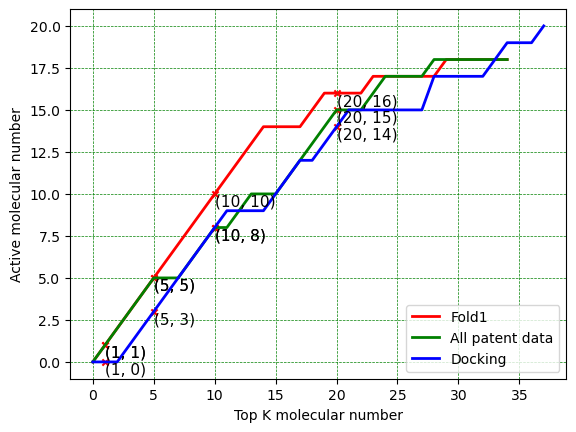

In [18]:
# 
# data_file_name="predict_csv/allpatentdata_templatedocking_attach_cvloss/P53_molecuale-2_with_preds.csv" #'predict_csv/attach_cv_loss/P53_molecuale-2_with_preds-fold1.csv'
data_file_name="./inhouse38_docking_score.csv"
#### <50
df_1 = pd.read_csv('predict_csv/attach_cv_loss/P53_molecuale-2_with_preds-fold1.csv', index_col=0) #   predict_csv/allpatentdata_templatedocking_attach_cvloss/P53_molecuale-2_with_preds.csv
# df_1=df_1.rename(columns={"sc150":"Activity(nm)","docking score":"pred"})
# df_1["pred"]=df_1["pred"].map(lambda x:np.abs(x))
df_1['new_label']=df_1['Activity(nm)'].map(lambda x: 0 if x=='None' or float(x)>200 else 1)
df_1['predict_label']=df_1['pred'].map(lambda x: 1 if x>0.5 else 0) #0.5
df_1=df_1.rename(columns={"new_label":"label"})
df_1#.head(3)

#### >=50 and <100
df_2 = pd.read_csv("predict_csv/allpatentdata_templatedocking_attach_cvloss/P53_molecuale-2_with_preds.csv", index_col=0) #   predict_csv/allpatentdata_templatedocking_attach_cvloss/P53_molecuale-2_with_preds.csv
# df_2=df_2.rename(columns={"sc150":"Activity(nm)","docking score":"pred"})
# df_2["pred"]=df_2["pred"].map(lambda x:np.abs(x))
df_2['new_label']=df_2['Activity(nm)'].map(lambda x: 0 if x=='None' or float(x)>200 else 1)
df_2['predict_label']=df_2['pred'].map(lambda x: 1 if x>0.5 else 0) #0.5
df_2=df_2.rename(columns={"new_label":"label"})
df_2#.head(3)

#### >=100 and <200
df_3 = pd.read_csv("./inhouse38_docking_score.csv", index_col=0) #   predict_csv/allpatentdata_templatedocking_attach_cvloss/P53_molecuale-2_with_preds.csv
df_3=df_3.rename(columns={"sc150":"Activity(nm)","docking score":"pred"})
df_3["pred"]=df_3["pred"].map(lambda x:np.abs(x))
df_3['new_label']=df_3['Activity(nm)'].map(lambda x: 0 if x=='None' or float(x)>200 else 1)
df_3['predict_label']=df_3['pred'].map(lambda x: 1 if x>0.5 else 0) #0.5
df_3=df_3.rename(columns={"new_label":"label"})
df_3#.head(3)

def new_draw_enrichment_curve(df_1,df_2,df_3,filename='ABN_cvloss_pred_4'):
    # different threadshod, get ture_positive_rate ->(x=Top K% , y=ture_positive_rate)
    for data,c,label in zip([df_1,df_2,df_3],['r','g','b'],['Fold1','All patent data','Docking']):
        x_topk_predict_score=[] #x axis
        y_tpr=[] #y axis
        thersholds=[]

        tmp_list=list(data['pred'])
        tmp_list.sort(reverse=True)
        for k in np.arange(0,data.shape[0]):
            x_topk_predict_score.append(k)
            threadshold=tmp_list[k]  #np.percentile(data_2['pred'], 100-k)
            thersholds.append(threadshold)
            # print("Top %d: %f"%(k,threadshold))
            # print(sum(data_2[data_2['pred']>threadshold]['predict_label'])/sum(data_2['predict_label'])*100)
            y_tpr.append(sum(data[data['pred']>threadshold]['label']))
            # y_tpr.append(sum(data_2[data_2['pred']>threadshold]['predict_label'])/sum(data_2['predict_label'])*100)

        # plt.style.use('ggplot')
        plt.plot(x_topk_predict_score, y_tpr, lw=2, color=c, label=label) #label='ROC (area = {0:.2f})'.format(roc_auc),
        # plt.scatter(np.array(x_topk_predict_score)[[1,5,10,20,50]],np.array(y_tpr)[[1,5,10,20,50]],s=30,marker='o',color='brown')

        for tmp in [1,5,10,20]:
            # 显示坐标点
            plt.scatter(np.array(x_topk_predict_score)[tmp],np.array(y_tpr)[tmp],s=20,marker='x',color = "r")
            # 显示坐标点横线、竖线
            # plt.vlines(np.array(x_topk_predict_score)[tmp], 0, np.array(y_tpr)[tmp], colors = "c", linestyles = "dashed")
            # plt.hlines(np.array(y_tpr)[tmp], 0, np.array(x_topk_predict_score)[tmp], colors = "c", linestyles = "dashed")
            # 显示坐标点坐标值
            plt.text(np.array(x_topk_predict_score)[tmp], np.array(y_tpr)[tmp], (int(np.array(x_topk_predict_score)[tmp]),round(np.array(y_tpr)[tmp],2)),ha='left', va='top', fontsize=11)

    # plt.xlim([-2, 105])  # 设置x、y轴的上下限，以免和边缘重合，更好的观察图像的整体
    # plt.ylim([-2, 105])
    plt.xlabel('Top K molecular number')
    plt.ylabel('Active molecular number')  # 可以使用中文，但需要导入一些库即字体
    # # plt.title('ROC Curve')
    plt.grid(True, linestyle = "--", color = "g", linewidth = "0.5")
    plt.legend(loc="lower right")#lower
    # plt.show()
    plt.savefig(filename+'.png')
    
    
new_draw_enrichment_curve(df_1,df_2,df_3,filename='./images/three_model_EF_curve_total')

### 模型适用性评估

#### 1.Series change

In [ ]:
data_2 = pd.read_csv('.csv', index_col=0) 
##标签再反转回来
# print(data_2.columns)
# data_2['pred_reverse']=data_2['pred'].map(lambda x: 1-x)
data_2['Activity(nm)']=data_2['Activity(nm)'].map(lambda x: 1500 if x=='None'  else float(x))
# data_2['predict_label']=data_2['pred'].map(lambda x: 1 if x>0.5 else 0) #0.5
# data_2=data_2.rename(columns={"new_label":"label"})
# data_2['diff'] = data_2['pred'] - data_2['new_label']
# data_2['label']=data_2['label'].map(lambda x: 1-x)
# data_2['pred']=data_2['pred'].map(lambda x: 1-x)
data_2#.head(3)

In [8]:
series_label=['4147','4146','4274','4043']
new_data_2=data_2.loc[series_label]
new_data_2

,Activity(nm),new_label,pred
Index,,,
4147,1136.0,0,0.828887
4146,72.0,1,0.738382
4274,393.0,0,0.807073
4043,23.0,1,0.970955


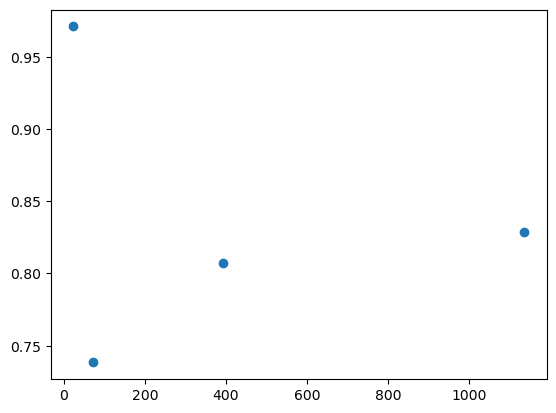

In [10]:
# r = sns.regplot(data=new_data_2, x='Activity(nm)', y='pred')
plt.scatter(list(new_data_2['Activity(nm)']),list(new_data_2['pred']))

In [79]:
###评估train set训练中的指标
y_true = [0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
        1., 0., 0., 1., 1., 1.]
y_pred = [0.3990, 0.3184, 0.2474, 0.3184, 0.7939, 0.5729, 0.8212, 0.8456, 0.4855,
        0.5294, 0.6945, 0.6945, 0.1878, 0.3990, 0.5729, 0.6153, 0.6945, 0.6153,
        0.5729, 0.4418, 0.2474, 0.6560, 0.6560, 0.9295, 0.6560, 0.3990, 0.5729,
        0.6153, 0.2474, 0.5294, 0.3990, 0.9402, 0.4418, 0.1624, 0.9818, 0.7939,
        0.3990, 0.3990, 0.9978, 0.3990, 0.6945, 0.3184, 0.1878, 0.2815, 0.5729,
        0.3990, 0.9295, 0.5294, 0.1878, 0.7939, 0.9818, 0.9743, 0.2474, 0.1624,
        0.6153, 0.2815, 0.3184, 0.5729, 0.8456, 0.8212]
# y_true=[1-tmp for tmp in y_true]
# y_pred=[1-tmp for tmp in y_pred]


# data_2 = pd.read_csv('P53_molecuale-2_with_preds.csv', index_col=0) # P53_molecuale-2_with_preds.csv
# data_2['predict_label']=data_2['pred'].map(lambda x: 1 if x>0.803 else 0) #0.5
# data_2=data_2.rename(columns={"new_label":"label"})
# # data_2['diff'] = data_2['pred'] - data_2['new_label']
# data_2

auc_value = roc_auc_score(y_true,y_pred)
print("sklearn auc:",round(auc_value,4))
## Other metrics
calculate_metrics(gt=list(y_true), pred=[1 if tmp>0.5 else 0 for tmp in list(y_pred)])
draw_ROC_curve(y_true, y_pred)

#### 回归模型统计性能

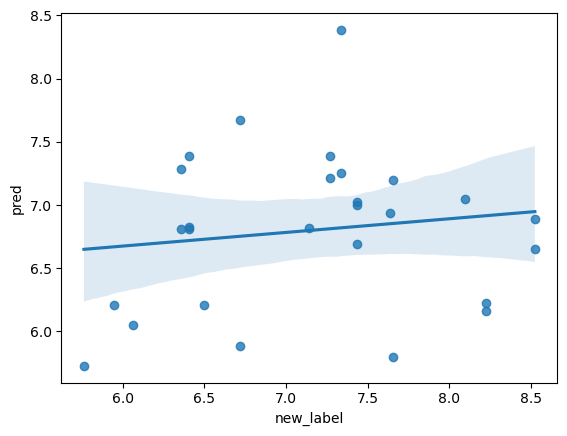

In [19]:
r = sns.regplot(data=data_2, x='new_label', y='pred')

In [ ]:
data_2['pred']

In [24]:
np.corrcoef(data_2['new_label'], data_2['pred'])

array([[1.        , 0.13839599],
       [0.13839599, 1.        ]])

In [21]:
np.corrcoef(data_2['new_label'], data_2['pred'])

array([[1.        , 0.13839599],
       [0.13839599, 1.        ]])

In [22]:
from scipy.stats import pearsonr
pccs = pearsonr(data_2['new_label'], data_2['pred'])
pccs

PearsonRResult(statistic=0.138395992406523, pvalue=0.491186601931717)

In [32]:
from itertools import combinations
sub_list=[tmp[0]-tmp[1] for tmp in list(combinations(data_2['new_label'], 2))]
label_list=[1 if tmp > 0 else 0 for tmp in sub_list ]

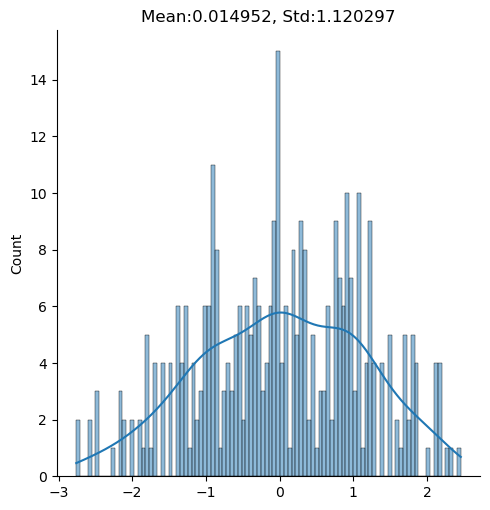

In [31]:
sub_list
p=sns.displot(sub_list,bins=100,kde=True)
p.set(title = "Mean:%f, Std:%f"%(np.mean(sub_list),np.std(sub_list)))

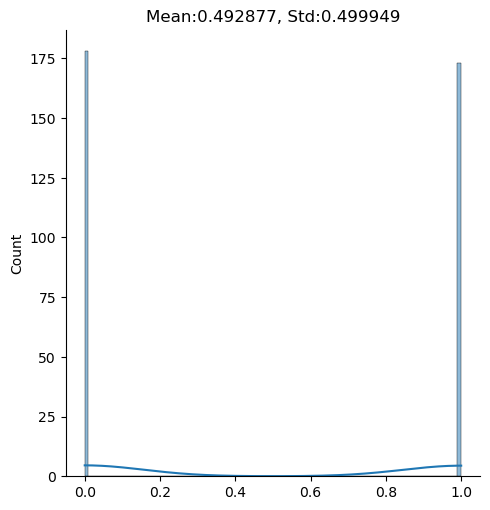

In [33]:
sub_list
p=sns.displot(label_list,bins=100,kde=True)
p.set(title = "Mean:%f, Std:%f"%(np.mean(label_list),np.std(label_list)))

## Check原始M_k和经过mlp层之后的M

In [10]:
# M_K=np.load("./Results/4043/M_baseline.npy") #Allostrate bond net的输出，所有边
# M=np.load("./Results/4043/Molecule_M_baseline.npy")  #经过MLP处理，变构分子相关的边

M_K=np.load("./Results/4043/M_basedon_baseline.npy") #Allostrate bond net的输出，所有边
M=np.load("./Results/4043/Molecule_M_basedon_baseline.npy")  #经过MLP处理，变构分子相关的边

# np.save(os.path.join('./Results/{}'.format(molecule_name),'M'), M_k.cpu().detach().numpy()) #所有边的结果
# np.save(os.path.join('./Results/{}'.format(molecule_name),'Molecule_M'), M.cpu().detach().numpy()) #与变构分子相关的分子
# csv_path = os.path.join('./Results/{}'.format(molecule_name),'molecule_bonds.csv')

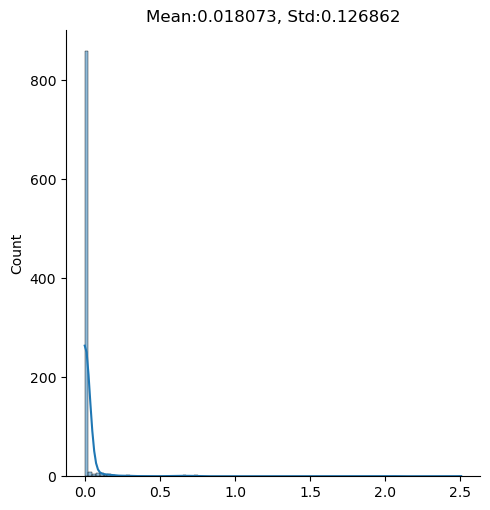

In [11]:
p=sns.displot(M_K,bins=100,kde=True)
p.set(title = "Mean:%f, Std:%f"%(np.mean(M_K),np.std(M_K)))
# plt.xlim((-0.005,0.005))

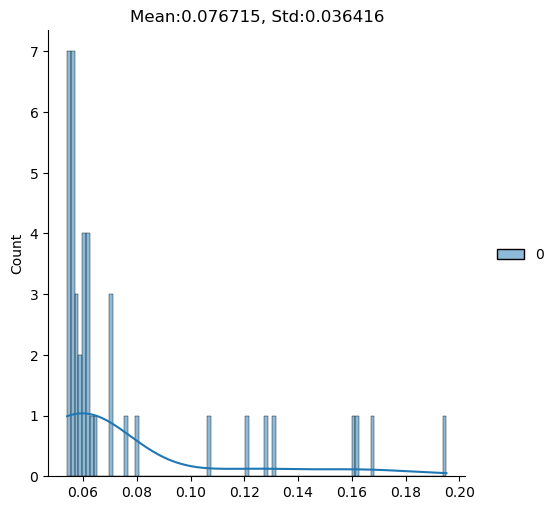

In [12]:
p=sns.displot(M,bins=100,kde=True)
p.set(title = "Mean:%f, Std:%f"%(np.mean(M),np.std(M)))
# plt.xlim((-0.005,0.005))

In [19]:
len(M)
M[0:20]

array([[0.22964622],
       [0.28925943],
       [0.17570832],
       [0.19069484],
       [0.20331341],
       [0.15962599],
       [0.15856642],
       [0.15516679],
       [0.15582514],
       [0.15648673],
       [0.15627742],
       [0.15648344],
       [0.15638207],
       [0.1562733 ],
       [0.15556896],
       [0.15518107],
       [0.15541045],
       [0.1555804 ],
       [0.1579239 ],
       [0.15496583]], dtype=float32)

: 

In [2]:
from molecule_bond_net import AllostrateBondNet, DownloadValueModel, RankNet
import torch

/home/ubuntu/anaconda3/envs/chemprop/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
device='cuda'
molecule_bond_net_model_path=''


##加载Baseline model，看baseline model在不同层的数据分布
baseline_model_pt='check_point/debug_code_v3_baselinemodel/Molecule_Bond_Net/fine_tuned_model_epoch_141_loss_0.316853_checkpoint.pt'

net=AllostrateBondNet(input_dim=51, output_dim=1) ##TODO: input_dim - 2
net = net.to(device)
regression = DownloadValueModel(net, device)
regression=regression.to(device)




ranknet=RankNet(regression)
ranknet=ranknet.to(device)
load_status_dict=torch.load(baseline_model_pt)
ranknet.load_state_dict(load_status_dict)
ranknet.eval()

### check模型的不同原子输入的数据区别


In [56]:
data = pd.read_excel('P53_molecuale-2.xlsx', index_col=0)
data = data.dropna()
molecule_list = [str(i) for i in data.index]
activity_label_list =  [float(i) for i in data['Label'].values]
activity_label_list = [(i-min(activity_label_list))/(max(activity_label_list)-min(activity_label_list)) for i in activity_label_list]

In [8]:
# for molecule_name, activity in zip(molecule_list,activity_label_list):
#     print(molecule_name, activity)

In [81]:
import torch

def get_feature(res_1_type,bond_type,res_2_type):
    '''
    res_1_type shape:(m)=(6217),取值为[0,22] TODO:need -1
    bond_type shape:(m)=(6217),取值为[0,4]
    '''
    #Res1
    index_res1=torch.tensor(res_1_type).unsqueeze(dim=-1)
    one_hot_res1 = torch.zeros(len(res_1_type), 23).scatter_(1, index_res1, 1)
    #Bond
    index_bond=torch.tensor(bond_type).unsqueeze(dim=-1)
    one_hot_bond = torch.zeros(len(bond_type), 5).scatter_(1, index_bond, 1)
    #Res2
    index_res2=torch.tensor(res_2_type).unsqueeze(dim=-1)
    one_hot_res2 = torch.zeros(len(res_2_type), 23).scatter_(1, index_res2, 1)

    X=torch.cat((one_hot_res1,one_hot_bond,one_hot_res2), 1)
    
    return X

def read_molecule_data(K_file,B_file,device,label_file):
    '''
    加载分子+靶点的数据（bagepype处理以后的结果）
    '''
    ## 矩阵W0
    B_files=np.load(B_file)
    W0=B_files['W0']                                  #shape:(m)=6217
    m=len(W0)
    # distribute_plot(W0,"raw_W.png")
    W0=torch.FloatTensor(W0).to(device)
    
    ## 矩阵B
    B=B_files['B']                                    #shape:(n,m)=(4702, 6217)
    B=torch.FloatTensor(B).to(device)

    ## 稀疏矩阵K
    K=np.load(K_file)  
    index = torch.LongTensor( K['coords'] )
    val = torch.FloatTensor( K['data'] )
    K = torch.sparse.FloatTensor(index, val, (K['shape'][0],K['shape'][1],K['shape'][2])).to(device)  #y_dense=y.to_dense() FloatTensor

    ## X (Feature)
    bond_type=B_files['bond_type']                    #shape:(m)=(6217),取值为[0,4]
    res_1_type=B_files['res_1_type']                  #shape:(m)=(6217),取值为[0,22] TODO:need -1
    res_2_type=B_files['res_2_type']                  #shape:(m)=(6217),取值为[0,22] TODO:need -1
    X=get_feature(res_1_type,bond_type,res_2_type)
    X=X.to(device)

    #加载row_index，column_index, need_label_index, labels
    label_file = np.load(label_file, allow_pickle=True)

    ## row_index,非共价键的边
    row_index=label_file['row_index']
    count_row=len(row_index)
    row_index=torch.tensor([True if i in row_index else False for i in range(m)]).to(device)  ##从m中选取

    ## column-index， 底物的非共价边
    column_index=label_file['column_index']
    coun_column=len(column_index)
    column_index=torch.tensor([True if i in column_index else False for i in range(m)]).to(device)

    #需要计算的边
    need_value_index = label_file['molecule_label_index']
    a=len(label_file['molecule_label_index'])
    need_value_index = torch.tensor([True if i in need_value_index else False for i in range(count_row)]).to(device)
    return W0, B, K, X, row_index, column_index, need_value_index, a

In [84]:
a_len=[]
for molecule_name, activity in zip(molecule_list,activity_label_list):
    #加载该分子的数据
    label_file = './Results/{}/molecule_label.npz'.format(molecule_name)
    K_file = './Results/{}/{}_K.npz'.format(molecule_name, molecule_name)
    B_file = './Results/{}/{}.npz'.format(molecule_name, molecule_name)
    device='cpu'
    W0, B, K, X, row_index, column_index, need_value_index,a = read_molecule_data(K_file,B_file,device,label_file)
    a_len.append(a)
    # break


In [88]:
max(a_len)

51

In [45]:
##先肉眼比较一下第一个和第二个分子的数据区别
molecule_name=molecule_list[0]
print(molecule_name)
activity=activity_label_list[0]
label_file = './Results/{}/molecule_label.npz'.format(molecule_name)
K_file = './Results/{}/{}_K.npz'.format(molecule_name, molecule_name)
B_file = './Results/{}/{}.npz'.format(molecule_name, molecule_name)
device='cpu'
W0, B, K, X, row_index, column_index, need_value_index = read_molecule_data(K_file,B_file,device,label_file)

print(W0.shape)
print(B.shape)
print(K.shape)
print(X.shape)
print(row_index.shape)
print(column_index.shape)
print(need_value_index.shape)

4043
torch.Size([4062])
torch.Size([3115, 4062])
torch.Size([3115, 3115, 4062])
torch.Size([4062, 51])
torch.Size([4062])
torch.Size([4062])
torch.Size([910])


In [46]:
molecule_name=molecule_list[1]
print(molecule_name)
activity2=activity_label_list[1]
label_file = './Results/{}/molecule_label.npz'.format(molecule_name)
K_file = './Results/{}/{}_K.npz'.format(molecule_name, molecule_name)
B_file = './Results/{}/{}.npz'.format(molecule_name, molecule_name)
device='cpu'
W0, B, K, X, row_index, column_index, need_value_index = read_molecule_data(K_file,B_file,device,label_file)

print(W0.shape)
print(B.shape)
print(K.shape)
print(X.shape)
print(row_index.shape)
print(column_index.shape)
print(need_value_index.shape)

4390
torch.Size([4056])
torch.Size([3115, 4056])
torch.Size([3115, 3115, 4056])
torch.Size([4056, 51])
torch.Size([4056])
torch.Size([4056])
torch.Size([904])


In [ ]:
molecule_list

In [ ]:
activity_label_list